# Smart Agent Recruitment Challenge

## PROBLEM STATEMENT:

FinMan is a Financial Distribution company. Over the last 10 years, they have created an offline distribution channel across India. They sell Financial products to consumers by hiring agents in their network. These agents are freelancers and get commission when they make a product sale.


### Overview of FinMan On-boarding process

The Managers at FinMan are primarily responsible for recruiting agents. Once a manager has identified a potential applicant, the would explain the business opportunity to the agent. Once the agent provides the consent, an application is made to FinMan to become an agent. This date is known as application_receipt_date.

In the next 3 months, this potential agent has to undergo a 7 day training at the FinMan branch (about Sales processes and various products) and clear a subsequent examination in order to become a FinMan agent.


### The problem - Who are the best agents?
 As is obvious in the above process, there is a significant investment which FinMan makes in identifying, training and recruiting these agents. However, there are a set of agents who do not bring in the expected resultant business. 

Finman has approached you and asked you to complete two separate tasks :- 


First : You are expected to create a Dashboard using PowerBI to analyse and observe the overall past recruitment data to help your client derive meaningful insights.
Second: You are expected to predict the target variable for each potential agent, which would help them identify the right agents to hire.


Fin. distribution company- A third-party distributor is an institution that sells or distributes mutual funds to investors for fund management companies. The distributor usually receives sales charge commissions for selling the investment company's mutual funds as well as a portion of the trailer fees associated with the fund

Manager -> Potential applicant Identification-> Business oppor. explained -> Becomes agent on consent on application_receipt date -> Next 3 months: 7 day training about Sales processess and various products; Exam-> Become Finman agent

OBJECTIVES:

    -Identify agents who bring in and do not bring in expected resultant business
    -Identify right agents to hire
    -Predict target variable for each potential agent

## DATA:

    - ID	:Unique Application ID
    - Office_PIN	:PINCODE of Fintro's Offices
    - Application_Receipt_Date:	Date of Application
    - Applicant_City_PIN:	PINCODE of Applicant Address
    - Applicant_Gender:	Applicant's Gender
    - Applicant_BirthDate:	Applicant's Birthdate
    - Applicant_Marital_Status:	Applicant's Marital Status
    - Applicant_Occupation:	Applicant's Occupation
    - Applicant_Qualification:	Applicant's Educational Qualification
    - Manager_DOJ:	Manager's Date of Joining
    - Manager_Joining_Designation:	Manager's Joining Designation in Fintro
    - Manager_Current_Designation:	Manager's Designation at the time of application sourcing
    - Manager_Grade:	Manager's Grade in Fintro
    - Manager_Status:	Current Employment Status (Probation / Confirmation)
    - Manager_Gender:	Manager's Gender
    - Manager_DoB:	Manager's Birthdate
    - Manager_Num_Application:	No. of Applications sourced in last 3 months by the Manager
    - Manager_Num_Coded:	No. of agents recruited by the manager in last 3 months
    - Manager_Business:	Amount of business sourced by the manager in last 3 months
    - Manager_Num_Products:	Number of products sold by the manager in last 3 months
        - Manager_Business2:	Amount of business sourced by the manager in last 3 months excluding business from their Category A advisor
        - Manager_Num_Products2:	Number of products sold by the manager in last 3 months excluding business from their Category A advisor
    - Business_Sourced(Target):	Business sourced by applicant within 3 months [1/0] of recruitment

## IMPORTING LIBRARIES AND DATASET

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import math

from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score

In [2]:
train_agent=pd.read_csv('train_agent.csv')
test_agent=pd.read_csv('test_agent.csv')

train_agent['source']='train'
test_agent['source']='test'

In [3]:
train_agent.head(4)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,source
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0,train
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1,train
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0,train
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0,train


In [15]:
combine_agent = train_agent.append(test_agent)
combine_agent.shape

(14572, 24)

#### HYPOTHESIS GENERATION

Which agents/applicants are likely to bring in more business sourced within 3 months of recruitment?

    - Do female applicants bring in more business than male?
    - Do applicants with single marital status bring in less business?
    - Are applicants with lesser qualifications unlikely to bring more business?
    - Do applicants with salaried occupation contribute to better business?
    - Are applicants living near the office able to generate higher business revenue?
    - Do younger applicants contribute more to the business source?
    - Do Managers with a higher grade recruit applicants who are more talented and bring more BSR?
    - Do older managers/ manager's DOJ have an impact on better recruitment experience and who brings in more BSR?
    - Do managers who are married bring in less BSR?
    - Does the current employement status of the manager affect BSR?
    - Does the number of agents recruited directly prop. to the no. of products?
    - Do managers who have a earlier DOJ contribute to more business sourced?
    - Does no. of products sold, manager business contribute data given contribute to the agents who bring in business?
    - Which Grade of Managers' bring in more efficient clients who contribute to better business sourced?

In [16]:
train_agent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9527 non-null   object 
 1   Office_PIN                   9527 non-null   int64  
 2   Application_Receipt_Date     9527 non-null   object 
 3   Applicant_City_PIN           9430 non-null   float64
 4   Applicant_Gender             9460 non-null   object 
 5   Applicant_BirthDate          9454 non-null   object 
 6   Applicant_Marital_Status     9454 non-null   object 
 7   Applicant_Occupation         8306 non-null   object 
 8   Applicant_Qualification      9441 non-null   object 
 9   Manager_DOJ                  8844 non-null   object 
 10  Manager_Joining_Designation  8844 non-null   object 
 11  Manager_Current_Designation  8844 non-null   object 
 12  Manager_Grade                8844 non-null   float64
 13  Manager_Status    

In [17]:
train_agent.shape

(9527, 24)

In [18]:
test_agent.shape

(5045, 23)

### Descriptive Statistics

In [19]:
train_agent.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Office_PIN,9527.0,452894.372205,235690.618252,110005.0,226001.0,416001.0,695014.00,851101.0
Applicant_City_PIN,9430.0,456784.547296,239291.081207,110001.0,226020.0,422005.5,695017.00,995657.0
Manager_Grade,8844.0,3.264134,1.137449,1.0,2.0,3.0,4.00,10.0
Manager_Num_Application,8844.0,1.939733,2.150529,0.0,0.0,1.0,3.00,22.0
Manager_Num_Coded,8844.0,0.758933,1.188644,0.0,0.0,0.0,1.00,9.0
Manager_Business,8844.0,184370.973428,274716.323095,-265289.0,0.0,102178.0,247116.50,3578265.0
Manager_Num_Products,8844.0,7.152307,8.439351,0.0,0.0,5.0,11.00,101.0
Manager_Business2,8844.0,182926.343962,271802.145895,-265289.0,0.0,101714.0,246461.25,3578265.0
Manager_Num_Products2,8844.0,7.131275,8.423597,0.0,0.0,5.0,11.00,101.0
Business_Sourced,9527.0,0.342920,0.474710,0.0,0.0,0.0,1.00,1.0


From the above, we can deduce from the mean and the median (from the 50th Percentile). This is most useful for continuous data points without extreme points.
We can deduce from the median when the data has exteme points and is ordered.

### Data Types:

Identifying categorical , numerical & target variables:
    - Target: Business_Sourced
    
    - Categorical: ID, Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Status,Manager_Gender
    
    - Numerical: Applicant_City_PIN, Manager_Num_Application, Manager_Num_Coded, Manager_Business,Manager_Num_Products,Manager_Business2, Manager_Num_Products2
    
    - Datetime: Application_Receipt_Date, Applicant_BirthDate,Manager_DOJ,Manager_DoB

#### (c) Exploring Numerical type variables

In [20]:
# Exploring Central tendencies of continuous (numeric variables)

numerical_cols=['Applicant_City_PIN', 'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
                'Manager_Num_Products','Manager_Business2', 'Manager_Num_Products2']


<AxesSubplot:xlabel='Manager_Business', ylabel='Density'>

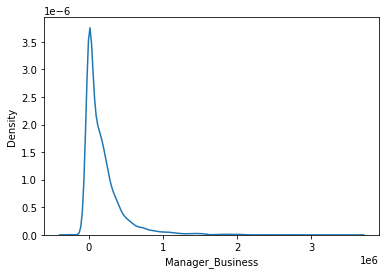

In [21]:
sns.kdeplot(train_agent['Manager_Business'])

<AxesSubplot:xlabel='Manager_Business2', ylabel='Density'>

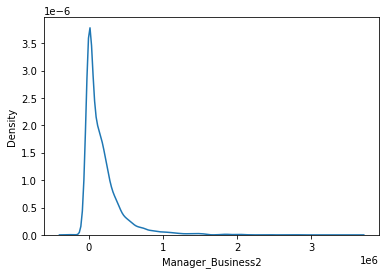

In [22]:
sns.kdeplot(train_agent['Manager_Business2'])

<AxesSubplot:xlabel='Manager_Num_Application', ylabel='Density'>

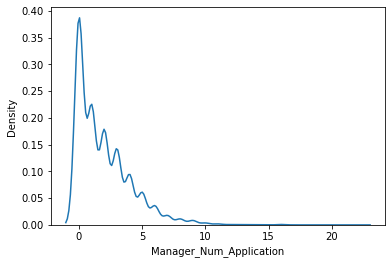

In [23]:
sns.kdeplot(train_agent['Manager_Num_Application'])

<AxesSubplot:xlabel='Manager_Num_Coded', ylabel='Density'>

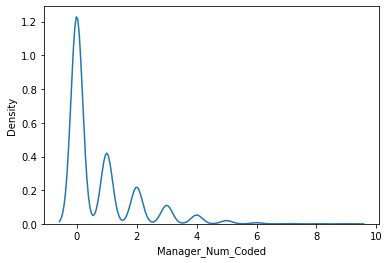

In [24]:
sns.kdeplot(train_agent['Manager_Num_Coded'])

<AxesSubplot:>

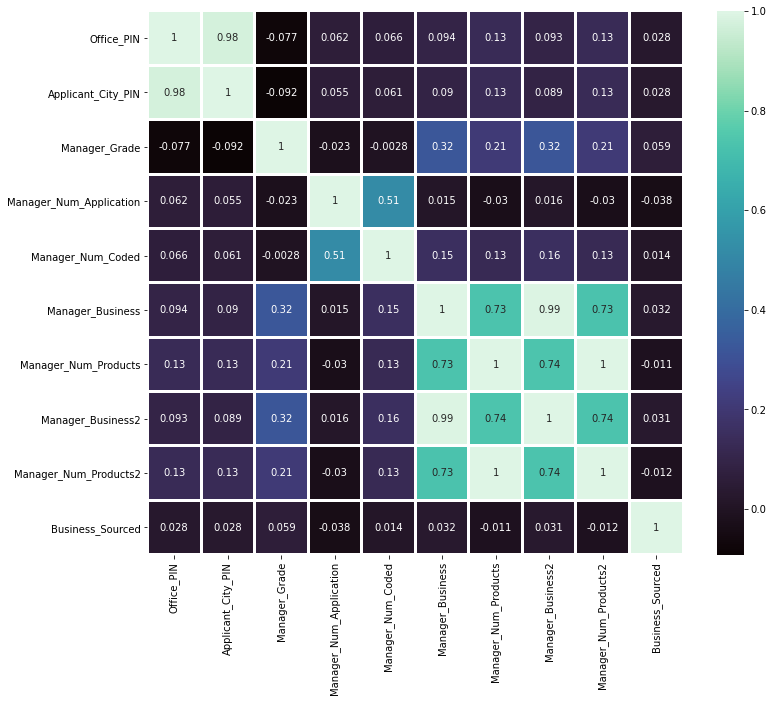

In [25]:
# Lets find correlation between the independent variables and Target variable

correlation = train_agent.corr(method = 'pearson')

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(correlation, linewidth=2, cmap="mako", annot=True) #jet

#### Since they are badly correlated, let's do Feature Engineering

In [26]:
# Converting to datetime (for creating new features)

date_columns=['Applicant_BirthDate','Manager_DOJ','Manager_DoB', 'Application_Receipt_Date']
for i in date_columns:
    combine_agent[i]= pd.to_datetime(combine_agent[i])

In [27]:
# Finding the age of the applicant (when application was received)
combine_agent['ApplicantAge'] = ((combine_agent['Application_Receipt_Date']- combine_agent['Applicant_BirthDate'])/ np.timedelta64(1, 'D'))/365

# Finding the Age and Experience (duration) of the Manager (when application was received)
combine_agent['ManagerExperience'] = ((combine_agent['Application_Receipt_Date']-combine_agent['Manager_DOJ'])/ np.timedelta64(1, 'D'))/365
combine_agent['ManagerAge'] =((combine_agent['Application_Receipt_Date']-combine_agent['Manager_DoB'])/ np.timedelta64(1, 'D'))/365

# Seggregating Category A advisor from amount of business sourced and no. of products sold from the 2nd column
combine_agent["Manager_Business2_categoryA"] = combine_agent["Manager_Business"] - combine_agent["Manager_Business2"]
combine_agent["Manager_Num_Products2_categoryA"] = combine_agent["Manager_Num_Products"] - combine_agent["Manager_Num_Products2"]

# Proximity of agent's location from work
combine_agent['Agent_proximity']=combine_agent['Office_PIN']-combine_agent['Applicant_City_PIN']

# Application conversion rate of manager - No. of recruitments
combine_agent['Application_CVR']=(combine_agent['Manager_Num_Coded']/combine_agent['Manager_Num_Application'])*100

In [28]:
numerical_cols=['Office_PIN','Applicant_City_PIN', 'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
                'Manager_Num_Products','Manager_Business2', 'Manager_Num_Products2', 'ManagerExperience', 'ManagerAge', 'Manager_Business2_categoryA','Manager_Num_Products2_categoryA',
               'Agent_proximity','Application_CVR','ApplicantAge', 'Manager_Grade']

In [29]:
for i in numerical_cols:
    to_be_filled=combine_agent[i].mode()[0]
    combine_agent[i].fillna(to_be_filled, inplace=True)

### Exploring and visualizing variables- Univariate and Bivariate analysis

#### (a) Exploring Categorical variables

<Figure size 1296x1296 with 0 Axes>

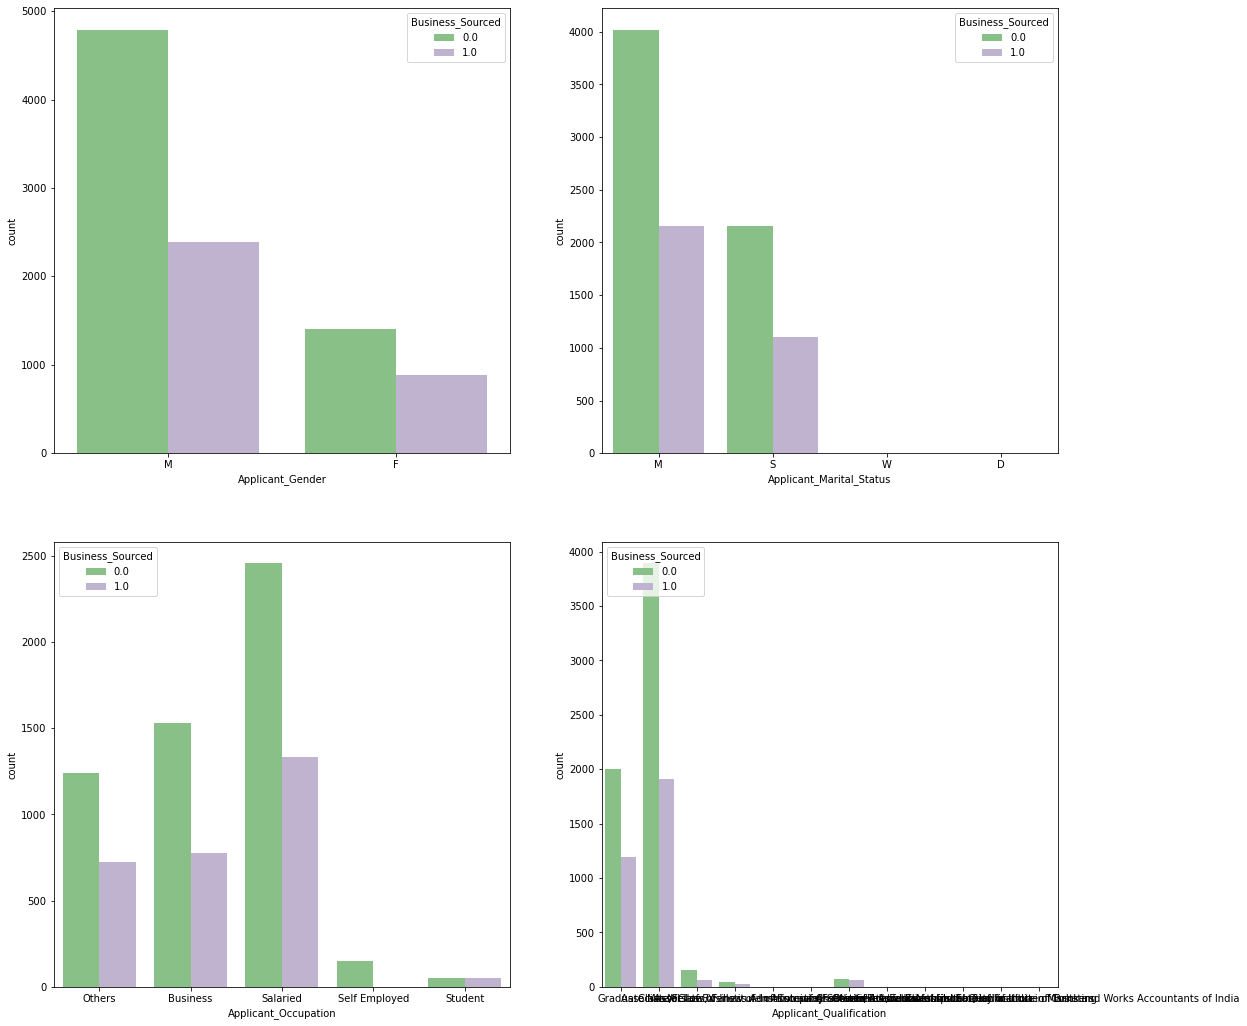

In [30]:
plt.figure(figsize=(18,18))
# sns.cubehelix_palette(as_cmap=True)

# sns.set_style('ticks')

fig,axs = plt.subplots(2,2, figsize=(18,18))
sns.countplot(x='Applicant_Gender',hue='Business_Sourced',data=combine_agent, ax=axs[0,0], palette="Accent")
sns.countplot(x='Applicant_Marital_Status',hue='Business_Sourced',data=combine_agent, ax=axs[0,1], palette="Accent")
sns.countplot(x='Applicant_Occupation',hue='Business_Sourced',data=combine_agent, ax=axs[1,0], palette="Accent")
sns.countplot(x='Applicant_Qualification',hue='Business_Sourced',data=combine_agent, ax=axs[1,1],palette="Accent")
plt.show()


<Figure size 1296x1296 with 0 Axes>

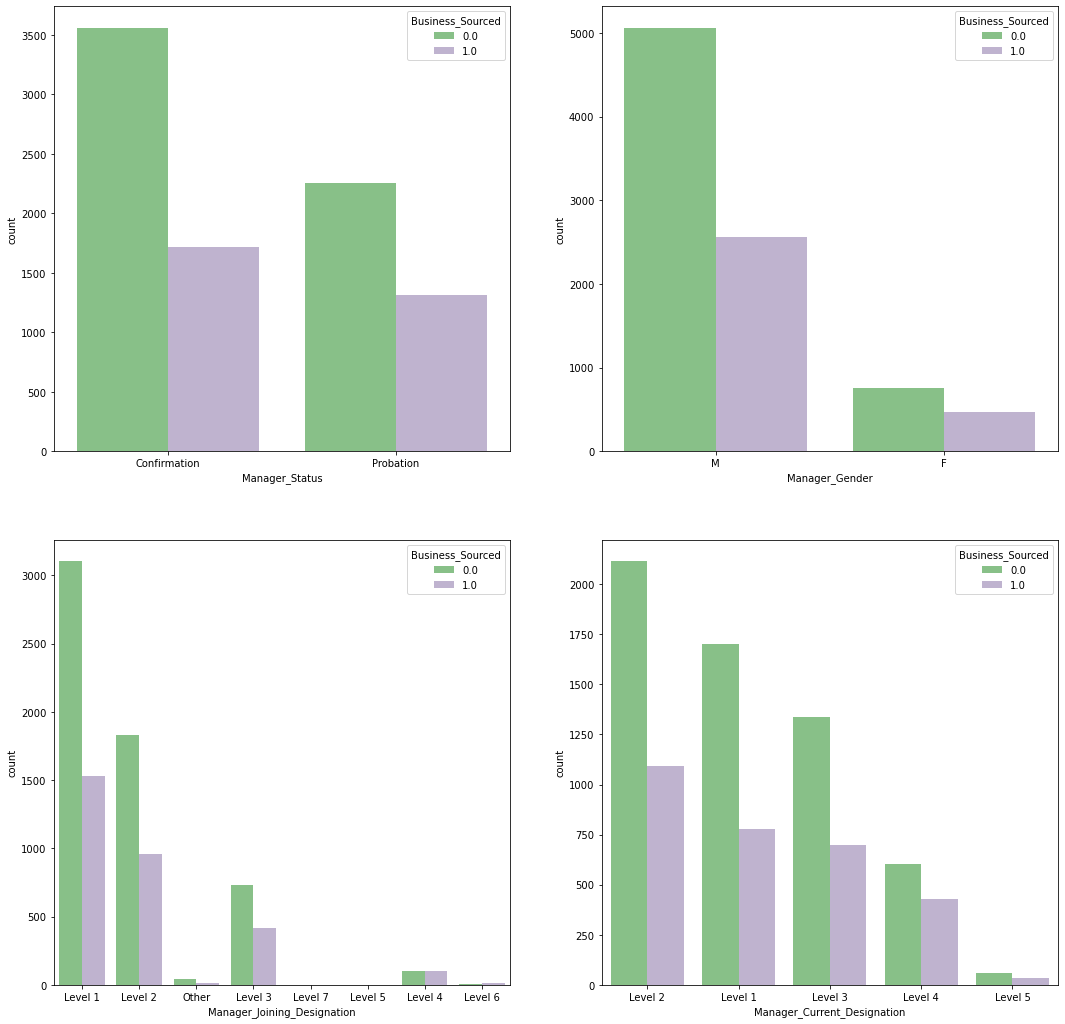

In [31]:
plt.figure(figsize=(18,18))
# sns.cubehelix_palette(as_cmap=True)

# sns.set_style('ticks')

fig,axs = plt.subplots(2,2, figsize=(18,18))
sns.countplot(x='Manager_Status',hue='Business_Sourced',data=combine_agent, ax=axs[0,0], palette="Accent")
sns.countplot(x='Manager_Gender',hue='Business_Sourced',data=combine_agent, ax=axs[0,1], palette="Accent")
sns.countplot(x='Manager_Joining_Designation',hue='Business_Sourced',data=combine_agent, ax=axs[1,0], palette="Accent")
sns.countplot(x='Manager_Current_Designation',hue='Business_Sourced',data=combine_agent, ax=axs[1,1], palette="Accent")
# axs.tick_params(axis='x', rotation=45)
plt.show()


### Feature Engineering

In [32]:
combine_agent[['Manager_Joining_Designation','Manager_Current_Designation']]
combine_agent.Manager_Joining_Designation.value_counts()

Level 1    5849
Level 2    4228
Level 3    2483
Level 4     408
Other        58
Level 6      21
Level 5      16
Level 7       2
Name: Manager_Joining_Designation, dtype: int64

We can deduce that 58 Managers have joining designation as "Other". This could be due to the fact that they were early employess and did not have a track of the designation. So lets convert all "Other" to Level 1

In [33]:
combine_agent['Manager_Joining_Designation']=combine_agent['Manager_Joining_Designation'].replace('Other','Level 1')

In [34]:
combine_agent.Manager_Joining_Designation.value_counts()

Level 1    5907
Level 2    4228
Level 3    2483
Level 4     408
Level 6      21
Level 5      16
Level 7       2
Name: Manager_Joining_Designation, dtype: int64

In [35]:
combine_agent.Manager_Current_Designation.value_counts()

Level 2    4648
Level 3    3563
Level 1    3366
Level 4    1365
Level 5     123
Name: Manager_Current_Designation, dtype: int64

In [36]:
# Treating Null values

# Filling with Level1 for Null values since it has more values for Manager joining Designation
combine_agent['Manager_Joining_Designation'].fillna('Level 1', inplace=True)

# Filling with Level2 for Null values since it has more values for Manager current Designation
combine_agent['Manager_Current_Designation'].fillna('Level 2',inplace=True)


In [37]:
combine_agent['Manager_Joining_Designation']=combine_agent.Manager_Joining_Designation.str.replace('Level ','', regex=True).astype(int)
combine_agent['Manager_Current_Designation']=combine_agent.Manager_Current_Designation.str.replace('Level ','', regex=True).astype(int)
# combine_agent['Manager_Joining_Designation'].astype(float)


In [38]:
combine_agent['Manager_Level_Hops']=combine_agent['Manager_Current_Designation']-combine_agent['Manager_Joining_Designation']

In [39]:
combine_agent.Manager_Level_Hops.value_counts()

 0    9494
 1    3315
 2    1270
 3     437
 4      33
-1      17
-2       6
Name: Manager_Level_Hops, dtype: int64

In [40]:
# Lets use the binning method to group Managers' levels

mgr_growth_list=[]
for levels in combine_agent['Manager_Level_Hops'].tolist():
    if levels>3:
        mgr_growth_list.append('High Growth')
    elif levels>1:
        mgr_growth_list.append('Medium Growth')
    else:
        mgr_growth_list.append('Low Growth')
        
combine_agent['Manager_Growth']= mgr_growth_list


<AxesSubplot:xlabel='Manager_Growth', ylabel='count'>

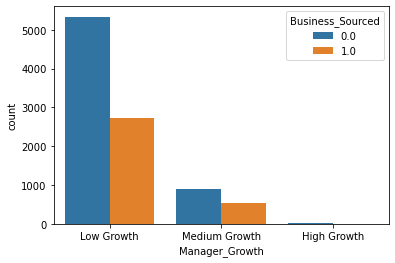

In [41]:
sns.countplot(x='Manager_Growth',hue='Business_Sourced',data=combine_agent)

<AxesSubplot:xlabel='Manager_Growth', ylabel='count'>

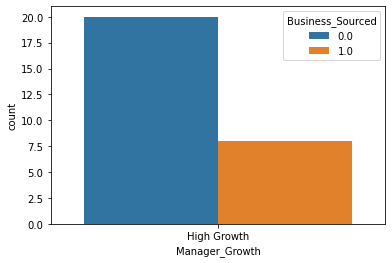

In [42]:
sns.countplot(x='Manager_Growth',hue='Business_Sourced',data = combine_agent[combine_agent.Manager_Growth=='High Growth'])

In [43]:
categorical_cols=['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation',
                   'Applicant_Qualification','Manager_Status','Manager_Gender','Manager_Joining_Designation',
                 'Manager_Current_Designation','Manager_Growth']

In [44]:
# Filling null values for categorical variables:

for i in categorical_cols:
    combine_agent[i].fillna('Unknown', inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder

categorical_cols=['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation',
                   'Applicant_Qualification','Manager_Status','Manager_Gender','Manager_Joining_Designation',
                 'Manager_Current_Designation','Manager_Growth']

for cat in categorical_cols:
    combine_agent[cat].fillna('Unknown', inplace=True)
    le= LabelEncoder()
    combine_agent[cat]= le.fit_transform(combine_agent[cat])

#### (b) Exploring Date type variables

In [46]:
date_columns=['Applicant_BirthDate','Manager_DOJ','Manager_DoB', 'Application_Receipt_Date']

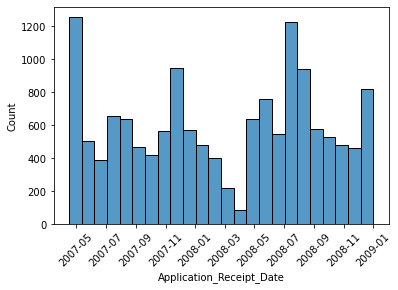

In [47]:
combine_agent= combine_agent.sort_values('Application_Receipt_Date',ascending=True)
ax=sns.histplot(combine_agent['Application_Receipt_Date'])
ax.tick_params(axis='x', rotation=45)

In [48]:
# Sorting the order of Applications_Receipt_Date

test_agent_copy=combine_agent[combine_agent.source=='test']
train_agent_copy=combine_agent[combine_agent.source=='train']

test_agent_copy['Application_Order'] = range(0, len(test_agent_copy))
train_agent_copy['Application_Order'] = range(0, len(train_agent_copy))

combine_agent= train_agent_copy.append(test_agent_copy)

<ipython-input-48-6b25a9012da8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_agent_copy['Application_Order'] = range(0, len(test_agent_copy))
<ipython-input-48-6b25a9012da8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_agent_copy['Application_Order'] = range(0, len(train_agent_copy))


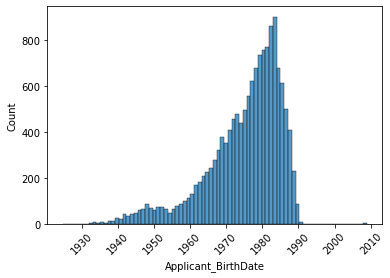

In [49]:
ax=sns.histplot(combine_agent['Applicant_BirthDate'])
ax.tick_params(axis='x', rotation=45)

### Handling Null values and Type conversion of Date columns

In [50]:
for j in date_columns:
    combine_agent[j].fillna(('1/1/1900'), inplace=True)

In [51]:
combine_agent['today']= pd.to_datetime(datetime.date.today())

In [52]:
for i in date_columns:
    combine_agent[i]= pd.to_datetime(combine_agent[i])
    combine_agent[i + '_date_diff']= (combine_agent['today']- combine_agent[i])
    combine_agent[i + '_date_diff']=(combine_agent[i + '_date_diff']/np.timedelta64(1, 'D')).astype('int')

Feature Engineering using date column - Let us create a column that ranks the application on the order at which the application is received in a day

In [53]:
train_agent_copy = combine_agent[combine_agent.source=='train']
test_agent_copy = combine_agent[combine_agent.source=='test']

train_agent_copy.sort_values(by=['Application_Receipt_Date','ID'], inplace=True)
train_agent_copy['application_rank'] = (train_agent_copy.groupby('Application_Receipt_Date')['ID'].cumcount()+1)

test_agent_copy.sort_values(by=['Application_Receipt_Date','ID'], inplace=True)
test_agent_copy['application_rank'] = (test_agent_copy.groupby('Application_Receipt_Date')['ID'].cumcount()+1)

combine_agent= train_agent_copy.append(test_agent_copy)

<ipython-input-53-8e7a6e203ccf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_agent_copy.sort_values(by=['Application_Receipt_Date','ID'], inplace=True)
<ipython-input-53-8e7a6e203ccf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_agent_copy['application_rank'] = (train_agent_copy.groupby('Application_Receipt_Date')['ID'].cumcount()+1)
<ipython-input-53-8e7a6e203ccf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

### Performing data normalization on Datediff columns 
Data normalization transforms numeric columns to same scale and improves the performance of the model- the learning algorithm (esp when there are a lot of unordered data)

In [54]:
# Min-max feature scaling using .min() and .max() methods
date_columns=['Application_Order', 'Applicant_BirthDate_date_diff',
       'Manager_DOJ_date_diff', 'Manager_DoB_date_diff',
       'Application_Receipt_Date_date_diff']

for i in date_columns:
    combine_agent[i] = (combine_agent[i] - combine_agent[i].min()) / (combine_agent[i].max() - combine_agent[i].min())


In [55]:
 numerical_cols=['Office_PIN','Applicant_City_PIN', 'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
                'Manager_Num_Products','Manager_Business2', 'Manager_Num_Products2', 'ManagerExperience', 'ManagerAge', 'Manager_Business2_categoryA','Manager_Num_Products2_categoryA',
               'Agent_proximity','Application_CVR','ApplicantAge', 'Manager_Grade']


In [56]:
# Dropping cols

to_be_deleted= ['Application_Receipt_Date', 'Applicant_BirthDate','Manager_DOJ', 'Manager_DoB',
        'Manager_Business2_categoryA',
       'Manager_Num_Products2_categoryA', 'Agent_proximity',
       'Manager_Level_Hops', 'today', 
       # Newly removed
      'Manager_DOJ_date_diff', 'Manager_DoB_date_diff', 'Application_CVR', 'ApplicantAge', 'Manager_Grade',
      'Applicant_Qualification'
               ]
combine_agent.drop(columns=to_be_deleted, inplace=True)

## Data Preprocessing

In [57]:
# As a result of FE, 1/0 (infinity values) were introduced- replacing them with 0 again
combine_agent.replace([np.inf, -np.inf], 0, inplace=True)

train_agent = combine_agent[combine_agent.source == 'train'].drop(['source','ID'], axis=1)
test_agent = combine_agent[combine_agent.source == 'test'].drop(['source','ID'], axis=1)

In [58]:
num_cols=list(set(numerical_cols)-set(to_be_deleted))
numerical_cols=train_agent[num_cols] #creating dataframe of only numeric cols- for standardization process

#### 1. Standardizing the dataset

In [59]:
# numerical_cols=['Office_PIN']
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
data_sc= sc.fit_transform(numerical_cols)

numerical_cols_std = pd.DataFrame(data_sc, columns=numerical_cols.columns.tolist())

In [60]:
# Merge the standardized numerical columns dataframe (numerical_cols_std) to main training dataframe (train_agent)

for col in numerical_cols_std.columns.to_list():
    train_agent[col]=numerical_cols_std[col]

#### 2. Preparing Test DF

In [61]:
# Preparing test file for final prediction
test_agent.drop(columns='Business_Sourced', inplace=True)
numerical_cols=test_agent[num_cols] #creating dataframe of only numeric cols- for standardization process
data_sc= sc.transform(numerical_cols)
numerical_cols_std = pd.DataFrame(data_sc, columns=numerical_cols.columns.tolist())

# Merge the standardized numerical columns dataframe (numerical_cols_std) to main testing dataframe (test_agent)
for col in numerical_cols_std.columns.to_list():
    test_agent[col]=numerical_cols_std[col]

## Model Building

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [63]:
#Changing datatype of target Variable to int (as expected)

y=train_agent['Business_Sourced'].astype('int')
X=train_agent.drop(columns=['Business_Sourced'])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

In [65]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)   # training should be done on the training set.

LogisticRegression(solver='liblinear')

In [66]:
LR.score(X_train, y_train)

0.7520010497310065

In [67]:
LR.score(X_test, y_test)

0.7507869884575026

Score of Test and train results are same, implying there are not bias or overfitting from training set

In [68]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)   # training should be done on the training set.
# fetch the accuracy of the model
LR.score(X_test, y_test)

y_pred = LR.predict(X_test)  # predicted classs labels
y_pred[:20]

# Fetch the prob
prob_values = LR.predict_proba(X_test)
prob_values

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1252
           1       0.65      0.60      0.62       654

    accuracy                           0.75      1906
   macro avg       0.72      0.72      0.72      1906
weighted avg       0.75      0.75      0.75      1906



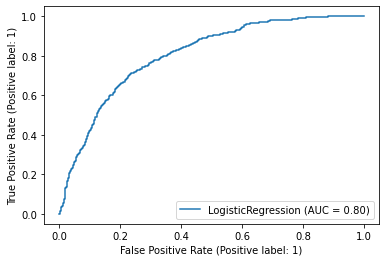

In [69]:
plot_roc_curve(LR, X_test, y_test) 

In [70]:
lr_pred_final= LR.predict_proba(test_agent)

lr_df = pd.DataFrame(lr_pred_final, columns=['Not_Business_Sourced', 'Business_Sourced'])
lr_df.drop(columns=['Not_Business_Sourced'], inplace=True)
lr_df.insert(0, 'ID', combine_agent[combine_agent.source=='test']['ID'].tolist())

In [71]:
lr_df.to_csv('lr_agent_recruitment.csv',index=False)

In [72]:
# Now that we have a simple logistic regression, let us use a cross validation on top of this

LR_cv = LogisticRegressionCV(cv=7,solver='liblinear',random_state=30)
LR_cv.fit(X_train, y_train)
LR_cv.score(X_train, y_train)

0.7521322661068102

In [73]:
LR_cv.score(X_test, y_test)

0.7523609653725079

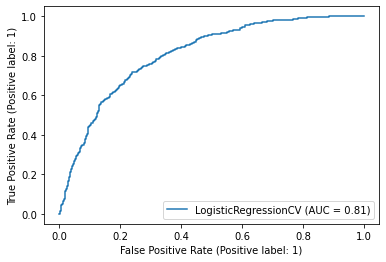

In [74]:
plot_roc_curve(LR_cv, X_test, y_test) 

In [75]:
y_pred = LR_cv.predict(X_test)  # predicted classs labels
y_pred[:20]

# Fetch the prob
prob_values = LR_cv.predict_proba(X_test)
prob_values

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1252
           1       0.65      0.59      0.62       654

    accuracy                           0.75      1906
   macro avg       0.73      0.71      0.72      1906
weighted avg       0.75      0.75      0.75      1906



In [76]:
lr_cv_pred_final= LR_cv.predict_proba(test_agent)

lr_cv_df = pd.DataFrame(lr_cv_pred_final, columns=['Not_Business_Sourced', 'Business_Sourced'])
lr_cv_df.drop(columns=['Not_Business_Sourced'], inplace=True)
lr_cv_df.insert(0, 'ID', combine_agent[combine_agent.source=='test']['ID'].tolist())

lr_df.to_csv('lr_cv_agent_recruitment.csv',index=False)

#### Trying out other models

In [77]:
# Let us use this with cross validation to get better results

def my_cross_validation_model(train,targets,model,params, folds=9):    
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_temp,test_temp) in enumerate(skf.split(train,targets)):
        
        # Split trining and test for cross validation
        x_train,y_train = train.iloc[train_temp], targets.iloc[train_temp]
        x_test,y_test = train.iloc[test_temp],targets.iloc[test_temp]
    
        models=model(**params)
        models.fit(x_train,y_train,
                  eval_set=[(x_test, y_test)],
                  early_stopping_rounds=100,
                  verbose=400
                  )
    
        pred = models.predict_proba(x_test)[:, 1]
        roc = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc}")
        print("-"*50)
        
    return models

In [78]:
# rfc= RandomForestClassifier()
rfc_params = {
    'n_estimators':200, 'random_state':42
}
result_rfc= RandomForestClassifier(**rfc_params)
# result_rfc = my_cross_validation_model(X_train,y_train,RandomForestClassifier,rfc_params)

result_rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [79]:
rfc_pred = result_rfc.predict(X_test)

rfc_auc = roc_auc_score(y_test, rfc_pred)
rfc_auc

0.7180987484245391

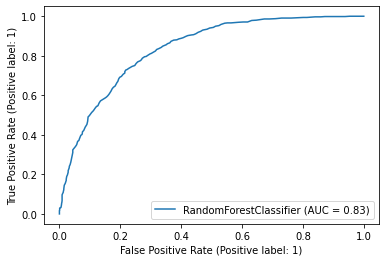

In [80]:
plot_roc_curve(result_rfc, X_test, y_test) 

In [81]:
rfc_pred_final= result_rfc.predict_proba(test_agent)

rfc_df = pd.DataFrame(rfc_pred_final, columns=['Not_Business_Sourced', 'Business_Sourced'])
rfc_df.drop(columns=['Not_Business_Sourced'], inplace=True)
rfc_df.insert(0, 'ID', combine_agent[combine_agent.source=='test']['ID'].tolist())

rfc_df.to_csv('rfc_agent_recruitment.csv',index=False)

RFC gave 71% but the logistic regression performed better

In [82]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('LGBM', LGBMClassifier()))
# models.append(('SVM', SVC()))

models # we have created a list of models which will be tried!!

[('LR', LogisticRegression(solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('CART', DecisionTreeClassifier()),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None,
                enable_categorical=False, gamma=None, gpu_id=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, reg_alpha=None,
                reg_lambda=None, scale_pos_weight=None, subsample=None,
                tree_method=None, validate_parameters=None, verbosity=None)),
 ('LGBM', LGBMClassifier())]

In [83]:
scores = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    names.append(name)
    scores.append(model.score(X_test, y_test) )

C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:01:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [84]:
names, scores

(['LR', 'LDA', 'CART', 'XGB', 'LGBM'],
 [0.7507869884575026,
  0.7303252885624344,
  0.7130115424973767,
  0.7696747114375656,
  0.789087093389297])

Looking at the scores (accuracy) of all the methods tried above, LGBM and XGB Classifier seems to be the best out of the lot.

## XGBoost

In [85]:
xgb = XGBClassifier()

In [86]:
# grid search
model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = {'n_estimators': n_estimators, 'max_depth': [3,4,5]}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
# grid_result = grid_search.fit(X_train, y_train)

# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']

# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [87]:
xgb_params= {'max_depth':3, 'n_estimators':200}
# result_xgb=XGBClassifier(**xgb_params)
result_xgb = my_cross_validation_model(X_train,y_train,XGBClassifier,xgb_params)
result_xgb.fit(X_train, y_train)

[23:01:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.61268


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[199]	validation_0-logloss:0.43458
roc_auc_score: 0.8636228564353371
--------------------------------------------------
[23:01:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.61416


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[199]	validation_0-logloss:0.43416
roc_auc_score: 0.8608493778245528
--------------------------------------------------
[23:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.61055


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[199]	validation_0-logloss:0.46383
roc_auc_score: 0.8422336408097566
--------------------------------------------------
[23:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.61211


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[199]	validation_0-logloss:0.45713
roc_auc_score: 0.8504024020305826
--------------------------------------------------
[23:01:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.61101


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[199]	validation_0-logloss:0.43206
roc_auc_score: 0.8629076120546861
--------------------------------------------------
[23:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.61797


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[199]	validation_0-logloss:0.46088
roc_auc_score: 0.8428144082672007
--------------------------------------------------
[23:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.60903


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[199]	validation_0-logloss:0.43669
roc_auc_score: 0.8606702267052337
--------------------------------------------------
[23:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.60591


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[199]	validation_0-logloss:0.43327
roc_auc_score: 0.86503349044902
--------------------------------------------------
[23:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.61529


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[199]	validation_0-logloss:0.45966
roc_auc_score: 0.84110022326966
--------------------------------------------------
[23:01:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
xgb_pred = result_xgb.predict(X_test)

xgb_auc = roc_auc_score(y_test, xgb_pred)
xgb_auc

0.7450513429277682

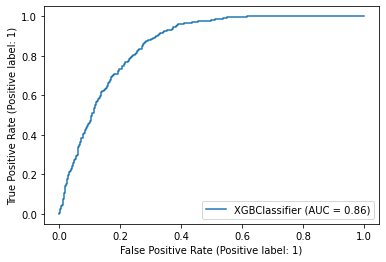

In [89]:
plot_roc_curve(result_xgb, X_test, y_test) 

In [90]:
xgb_pred_final= result_xgb.predict_proba(test_agent)

xgb_df = pd.DataFrame(xgb_pred_final, columns=['Not_Business_Sourced', 'Business_Sourced'])
xgb_df.drop(columns=['Not_Business_Sourced'], inplace=True)
xgb_df.insert(0, 'ID', combine_agent[combine_agent.source=='test']['ID'].tolist())

xgb_df.to_csv('xgb_agent_recruitment.csv',index=False)

In [90]:
# HP Tuning of XGB
xgb_params_grid={'n_estimators': [100,500,1000,2000], 
             'max_depth': [3,4,5,6], 
             'subsaample': [0.6, 0.8, 1.0], 
             'colsample_bytree': [0.6, 0.8, 1.0], 
                'gamma': [0.5, 1, 1.5, 2, 5]}
model = XGBClassifier(learning_rate=0.02,objective='binary:logistic',silent=True, nthread=1)

kfold = model_selection.KFold(n_splits=7, shuffle=True, random_state=5)
grid = GridSearchCV(estimator=model, param_grid=xgb_params_grid,
                    scoring='roc_auc', cv=kfold )
# grid_result = grid.fit(X_train, y_train) # Commenting this since the best parameters are already captured

grid_best_params = {'colsample_bytree': 0.6,
 'gamma': 0.5,
 'max_depth': 6,
 'n_estimators': 2000,
 'subsample': 0.8}

In [91]:
# grid_result.best_params_

In [92]:
## Now using XGBoost

xgb_params={'colsample_bytree': 0.6,
 'gamma': 0.5,
 'max_depth': 6,
 'n_estimators': 2000,
 'subsample': 0.8}

result_xgb = my_cross_validation_model(X_train,y_train,XGBClassifier,xgb_params)
# xgb.fit(X_train, y_train)

[10:15:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.66108


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[110]	validation_0-logloss:0.70983
roc_auc_score: 0.6075805591036234
--------------------------------------------------
[10:15:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.66314


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[112]	validation_0-logloss:0.70535
roc_auc_score: 0.5923539588352278
--------------------------------------------------
[10:15:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.65974


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[110]	validation_0-logloss:0.69347
roc_auc_score: 0.6332276997202865
--------------------------------------------------
[10:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.65873


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[106]	validation_0-logloss:0.67240
roc_auc_score: 0.6342382253553008
--------------------------------------------------
[10:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.66417


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[115]	validation_0-logloss:0.66910
roc_auc_score: 0.6437290821193552
--------------------------------------------------
[10:15:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.66349


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[107]	validation_0-logloss:0.68927
roc_auc_score: 0.5894881081343272
--------------------------------------------------
[10:15:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.66748


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[109]	validation_0-logloss:0.71699
roc_auc_score: 0.5564883829973
--------------------------------------------------
[10:15:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.66481


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[104]	validation_0-logloss:0.68898
roc_auc_score: 0.5950254175744372
--------------------------------------------------
[10:15:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.66554


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[107]	validation_0-logloss:0.70455
roc_auc_score: 0.5904742231295163
--------------------------------------------------


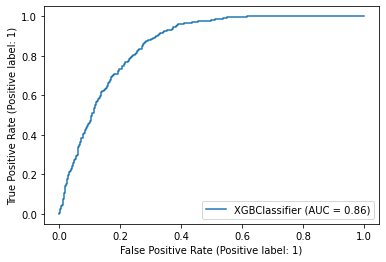

In [422]:
plot_roc_curve(result_xgb, X_test, y_test) 

In [102]:
xgb_pred_final= result_xgb.predict_proba(test_agent)

xgb_df = pd.DataFrame(xgb_pred_final, columns=['Not_Business_Sourced', 'Business_Sourced'])
xgb_df.drop(columns=['Not_Business_Sourced'], inplace=True)
xgb_df.insert(0, 'ID', combine_agent[combine_agent.source=='test']['ID'].tolist())

xgb_df.to_csv('xgb_agent_recruitment.csv',index=False)

Though the score on the training data is 0.78 which is better than the logistic regression, it gives a lower value on the test (unseen) data. Therefore lets stick with logistic regression for this problem